**Créditos**: baseado nun código visto en: https://medium.com/@a.fernandez.troyano/nube-de-palabras-word-cloud-con-python-a-partir-de-varias-webs-111e94220822

Repo orixinal: https://github.com/bigdatawirtz/nubes/blob/main/nube_de_respostas.ipynb

# Facendo unha nube de palabras

## Instalando dependencias

- conda activate bigdata

- conda install numpy pandas

- conda install -c conda-forge wordcloud nltk

## Cargamos librarías

In [1]:
#Librerías básicas
import numpy as np
import pandas as pd

#Librerías para imaxes, nubes de palabras e plot
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

#Librarías para limpieza de datos
import string
import nltk
from nltk.corpus import stopwords

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Carga de texto**

In [3]:
#texto = """
#El Big Data es una cosa muy buena. Muy buena tiene que ser, y muy grande, por lo de Big.
#El Big Data es cuando tratas muchos datos.
#El Big Data es utilizar muchos datos para extraer información.
#"""
# Crear unha nube de etiquetas en base a las definiciones recogidas en un archivo .txt
fichero = open("defino.txt", "r")
texto = fichero.read()
fichero.close()

In [4]:
# Ampliacion 1 (Despues de ejecutar este ejecute todos a partir de "Limpeza do texto")
# Importamos las librerias que nos permitiran descargarnos la pagina web y otra para limpiar esta pagina y recoger solo el texto
import urllib3
from bs4 import BeautifulSoup

# Le indicamos el cliente con el que vamos a acceder 
ua = "Mozilla/5.0 (Linux; U; Android 2.2; en-us; Nexus One Build/FRF91) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1"  
h = {"User-Agent": ua}
http = urllib3.PoolManager()

# indicamos la direccion de la pagina que vamos a descargar, en este caos una noticia
medioDigital = "https://www.lavozdegalicia.es/noticia/espana/2023/11/22/primer-consejo-ministros-nuevo-gobierno/00031700645724487114706.htm"
r = http.request('GET', medioDigital, fields=None, headers=h)

# utilizando BeautifulSoup recogemos de la pagina web solo el texto
web_solotexto = BeautifulSoup(r.data, "html.parser")
solotexto = ""
for w in web_solotexto.find_all('p'):
    solotexto += w.get_text()

# creamos una string vacia donde almacenaremos el texto "limpio"
salida = ""

for linea in solotexto.split("\n"): # dividimos el texto utilizando el salto de pagina como divisor
    aux = linea.strip() # le quitamos los espacios en blanco y otros caracteres 
    if aux and len(aux) > 50: # si la longitud es mayor a 50 la guardamos en el string que creamos anteriormente
        salida += aux + "\n" 

texto = salida

In [5]:
# Ampliacion 2 (Despues de ejecutar este ejecute todos a partir de "Limpeza do texto")
import urllib3, json
from bs4 import BeautifulSoup

def descargar_pagina(medioDigital):
    ua = "Mozilla/5.0 (Linux; U; Android 2.2; en-us; Nexus One Build/FRF91) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1"  
    h = {"User-Agent": ua}
    http = urllib3.PoolManager()
    return http.request('GET', medioDigital, fields=None, headers=h)

def recoger_texto_pagina(pagina) -> str:
    text = BeautifulSoup(pagina.data, "html.parser")
    salida = ""
    for t in text.find_all(['h1', 'h2', 'h3', 'h4', 'h5', 'h6']): # Con esto solo recogo de la pagina web los h
        salida += t.get_text()
    return salida


def limpiar_texto(texto) -> str:
    salida = ""

    for linea in texto.split("\n"): 
        aux = linea.strip() 
        if aux and len(aux) > 50: 
            salida += aux + "\n" 

    return salida

def cargar_json(nombre = "periodicos.json") -> list:
    return json.load(open(nombre))
    
webs = cargar_json("periodicos.json")

salida  = ""
for web in webs:
    salida += limpiar_texto(recoger_texto_pagina(descargar_pagina(web["url"])))

texto = salida

In [6]:
texto

'Los colegios de Madrid priorizarán la jornada partida y en los nuevos centros será obligatoriaEl Gobierno británico pedirá un permiso electrónico de entrada para los turistas de la UESánchez recibe a Edmundo González y asegura trabajar por "la democracia y el diálogo" en VenezuelaLos colegios de Madrid priorizarán la jornada partida y en los nuevos centros será obligatoriaMadrid abrirá el primer Centro de Atención Integral Especializado de España para hombres víctimas de violencia sexualPutin vuelve a amenazar a la OTAN con entrar en guerra con EEUU y Europa si autoriza el uso de misiles de largo alcance a UcraniaReino Unido pedirá un permiso electrónicode entrada para los turistas de la Unión EuropeaEl BCE baja los tipos 0,25 puntos e insufla oxígeno a los hipotecados con un euríbor a la bajaMotos se encomienda a Lamine Yamal para tratar de recuperar el liderato y Broncano recurre a un invitado de emergenciaYamal, en \'El Hormiguero\': "Cuando le dije al rey que tenía 16 años se empe

**Limpeza do texto**

In [7]:
#Generación de lista de signos de puntuación

punctuation=[]
for s in string.punctuation:
    punctuation.append(str(s))
sp_punctuation = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«"]    

punctuation += sp_punctuation

punctuation[:10] #Ejemplo de los símbolos de puntuación que están incluidos

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*']

In [8]:
#Listado de palabras que queremos eliminar del texto
#Es un proceso iterativo por lo que si después vemos que nos siguen quedado "caractéres raros" simplemente venímos aquí y los agregamos
#Existe librerías y listados de "Stop_words", pero por ahora vamos a dejarlo vacío

#nltk.download('stopwords') #La primera vez debemos descargar las "stopwords"

stop_words = stopwords.words('spanish') #Listado de palabras a eliminar

stop_words += ["\u200b", "\xa0", "para", "como", "puede","cómo", "hacer", "forma", "parte", "hace", "además", "según", "pueden", "ser"] #Añadimos algunos caractéres que hemos encontrado

stop_words[:10]


['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

In [9]:
#Reemplazamos signos de puntuación por "":
for sw in stop_words:
    clean_texto = texto.lower().replace(sw,"")
    
for p in punctuation:
    clean_texto = clean_texto.replace(p,"")

#Eliminamos espacios blancos, saltos de línea, tabuladores, etc    
#clean_texto = " ".join(clean_texto.split())    

#Reemplazamos stop_words por "":    
for stop in stop_words:
    clean_texto_list = clean_texto.split()
    clean_texto_list = [i.strip() for i in clean_texto_list]
    try:
        while stop in clean_texto_list: clean_texto_list.remove(stop)
    except:
        print("Error")
        pass
    clean_texto= " ".join(clean_texto_list)


In [10]:
lista_texto = clean_texto.split(" ")

palabras = []

#Paso intermedio para eliminar palabras muy cortas (emoticonos,etc) y muy largas (ulr o similar) que se nos hayan pasado:

for palabra in lista_texto:
    if (len(palabra)>=3 and len(palabra)<18):
        palabras.append(palabra)

**Contaxe de palabras**

In [11]:
#Generamos un diccionario para contabilizar las palabras:

word_count={}

for palabra in palabras:
    if palabra in word_count.keys():
        word_count[palabra][0]+=1
    else:
        word_count[palabra]=[1]

In [12]:
#Generamos el DF y lo ordenamos:

df = pd.DataFrame.from_dict(word_count).transpose()
df.columns=["freq"]
df.sort_values(["freq"], ascending=False, inplace=True)
df.head(10)

,freq
tras,16
nuevo,15
mujer,14
españa,13
madrid,13
dos,12
años,12
euros,11
vida,10
mundo,9


**Mostrar gráfica de ocorrencias das palabras**

In [13]:
def plot_bar(data=df, top=5):    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(x =df.iloc[:top,:].index, height = df.iloc[:top,0].values)
    plt.show()

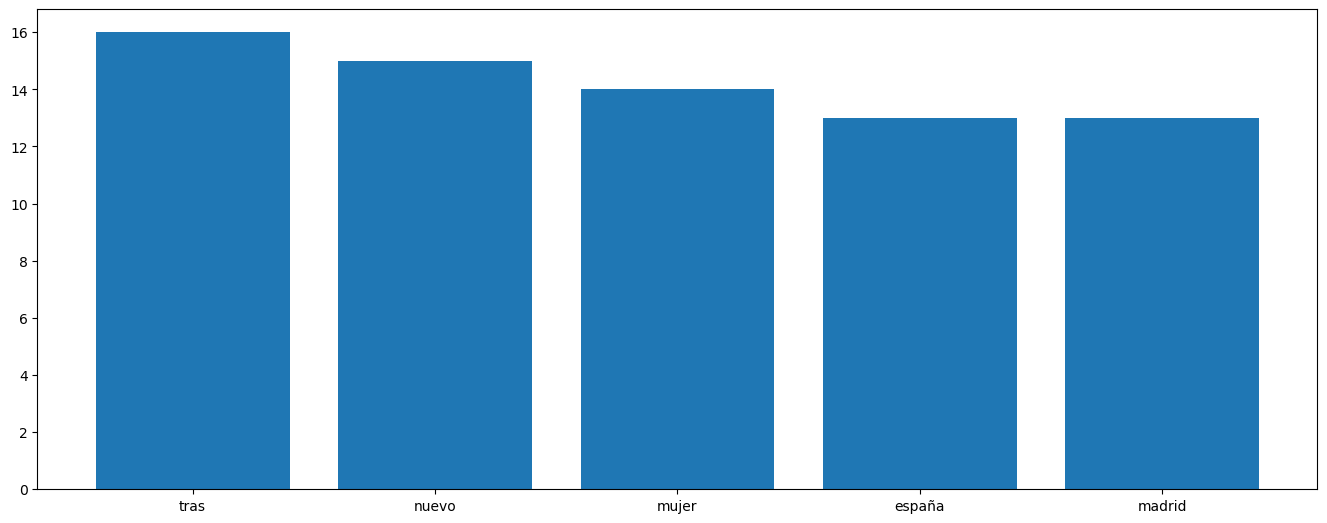

In [14]:
#Graficamos el TOP 5 palabras por frecuencia

plot_bar(data=df, top=5)

**Crear nube de palabras**

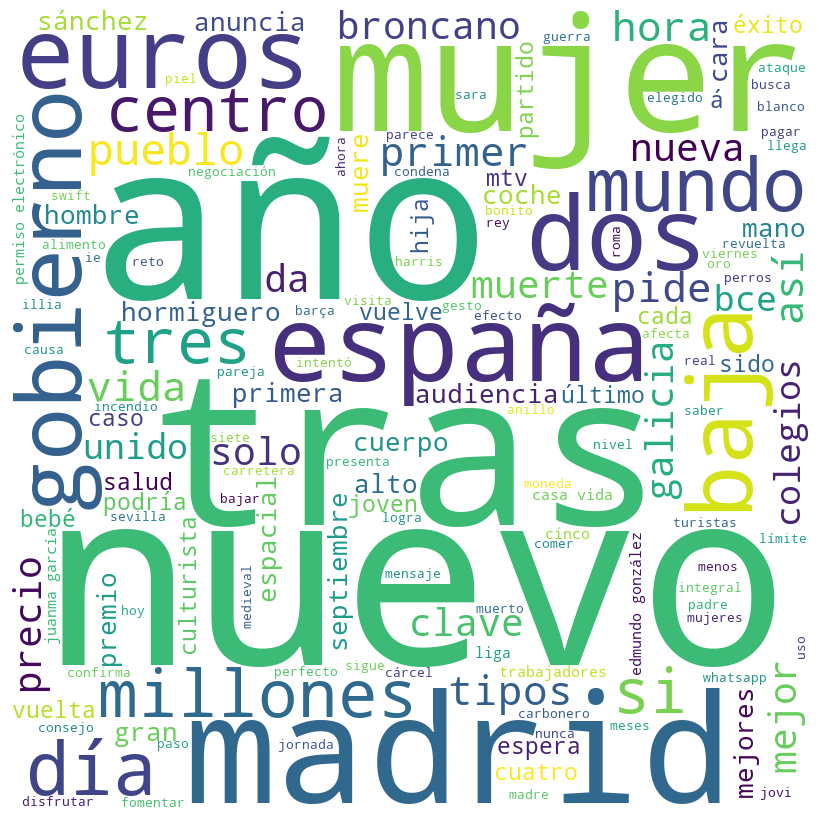

In [15]:
#word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5, collocation_threshold=10).generate(clean_texto)
word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5).generate(clean_texto)

#word_cloud.to_file("./img/ejemplo_sencillo.png") #Guardamos la imagen generada
#word_cloud.to_file("./img/ejemplo_sencillo.png") #Guardamos la imagen generada

plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()